# We use the dataset from https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html

The main objective of this notebook is to extract feature vectors from this flower dataset, then find the top K closest images to a testing image by comparing their feature vectors. We use Euclidean distance to compare their feature vectors.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_folder = "/content/drive/MyDrive/hcmus lab/102flowers/jpg"
data_test = "/content/drive/MyDrive/hcmus lab/102flowers_test/jpg"



In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import  Model

from PIL import Image
import pickle
import numpy as np


# Use VGG16 pretrained model and discard the last layer

In [5]:
def get_extract_model():
    vgg16_model = VGG16(weights="imagenet")
    extract_model = Model(inputs=vgg16_model.inputs, outputs = vgg16_model.get_layer("fc1").output)
    return extract_model
model = get_extract_model()

553467096/553467096 [==============================] - 16s 0us/step


# Image preprocessing

In [6]:
def image_preprocess(img):
    img = img.resize((224,224))
    img = img.convert("RGB")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Get feature vector from pretrained model

In [7]:
def extract_vector(model, image_path):

    img = Image.open(image_path)
    img_tensor = image_preprocess(img)

    # Trich dac trung
    vector = model.predict(img_tensor)[0]
    # Chuan hoa vector = chia chia L2 norm (tu google search)
    vector = vector / np.linalg.norm(vector)
    return vector


# Get images from the dataset and take their feature vectors

In [ ]:
vectors = []
paths = []

import os

for image_path in os.listdir(data_folder):
    # Noi full path
    image_path_full = os.path.join(data_folder, image_path)
    # Trich dac trung
    image_vector = extract_vector(model,image_path_full)
    # Add dac trung va full path vao list
    vectors.append(image_vector)
    paths.append(image_path_full)

vector_file = "vectors.pkl"
path_file = "paths.pkl"
pickle.dump(vectors, open(vector_file, "wb"))
pickle.dump(paths, open(path_file, "wb"))

# Get top K closest images 

Take 1 image from the test set and compute the "distance" from that image to other images in the training set.

1/1 [==============================] - 0s 133ms/step


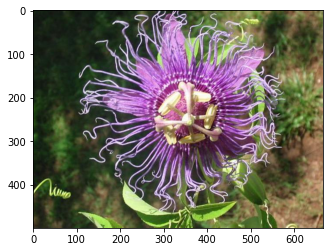

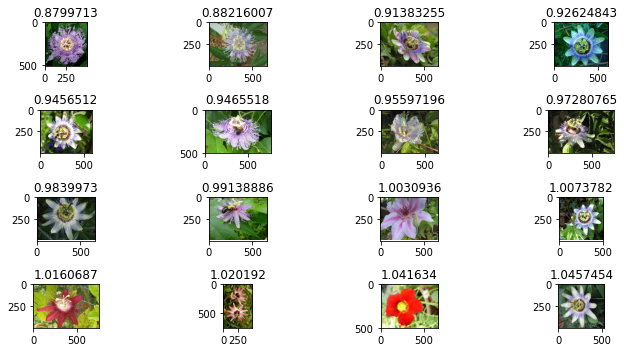

In [10]:
# Dinh nghia anh can tim kiem
search_image = "/content/drive/MyDrive/hcmus lab/102flowers_test/jpg/image_00021.jpg"

# Khoi tao model

model = get_extract_model()

# Trich dac trung anh search
search_vector = extract_vector(model, search_image)

# Tinh khoang cach tu search_vector den tat ca cac vector
distance = np.linalg.norm(vectors - search_vector, axis=1)

# Sap xep va lay ra K vector co khoang cach ngan nhat
K = 16
ids = np.argsort(distance)[:K]

# Tao oputput
nearest_image = [(paths[id], distance[id]) for id in ids]

# Ve len man hinh cac anh gan nhat do
import matplotlib.pyplot as plt
import math

plt.imshow(Image.open(search_image))

axes = []
grid_size = int(math.sqrt(K))
fig = plt.figure(figsize=(10,5))


for id in range(K):
    draw_image = nearest_image[id]
    axes.append(fig.add_subplot(grid_size, grid_size, id+1))

    axes[-1].set_title(draw_image[1])
    plt.imshow(Image.open(draw_image[0]))

fig.tight_layout()
plt.show()